In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials # Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=18NXjZIXcD1TK82rFot9BtyVpVCNmIS16' # The shareable link
fluff, id = link.split('=')
print(id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('app_cleaned.csv')  

app = pd.read_csv('app_cleaned.csv')# Dataset is now stored in a Pandas Dataframe
app.drop(['Unnamed: 0'], axis = 1, inplace= True)
print('Training data shape: ', app.shape)
app.head()

18NXjZIXcD1TK82rFot9BtyVpVCNmIS16
Training data shape:  (307508, 55)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CREDIT_INTEREST,CLIENT_AGE,CLIENT_AGE_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,0,0,0,Business Entity Type 3,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.061,25.920548,1.745205
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1293502.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,0,0,0,School,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.028,45.931507,3.254795
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,0,0,0,Government,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.050,52.180822,0.616438
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,0,0,0,Business Entity Type 3,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.095,52.068493,8.326027
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,0,1,1,Religion,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.043,54.608219,8.323288


In [ ]:
listItem = []

for col in app.columns:
    listItem.append([col, app[col].dtype, app[col].isna().sum(), round((app[col].isna().sum())/len(app[col])), 
                    app[col].nunique(), list(app[col].drop_duplicates().sample().values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc



,data features,dataType,null,nullPct,unique,uniqueSample
0,TARGET,int64,0,0.0,2,[0]
1,NAME_CONTRACT_TYPE,object,0,0.0,2,[Revolving loans]
2,CODE_GENDER,object,0,0.0,3,[M]
3,FLAG_OWN_CAR,object,0,0.0,2,[N]
4,FLAG_OWN_REALTY,object,0,0.0,2,[Y]
5,CNT_CHILDREN,int64,0,0.0,15,[14]
6,AMT_INCOME_TOTAL,float64,0,0.0,2548,[54994.5]
7,AMT_CREDIT,float64,0,0.0,5603,[1072809.0]
8,AMT_ANNUITY,float64,0,0.0,13676,[50287.5]
9,AMT_GOODS_PRICE,float64,0,0.0,5603,[1373521.5]


In [ ]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
categorical_columns = app.select_dtypes('object').columns

In [ ]:
import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramers.append(cramers_v(app['TARGET'], app[i]))

In [ ]:
#H0 = tiap data indipendent/ tidak ada hubungan

from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(app['TARGET'], app[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')

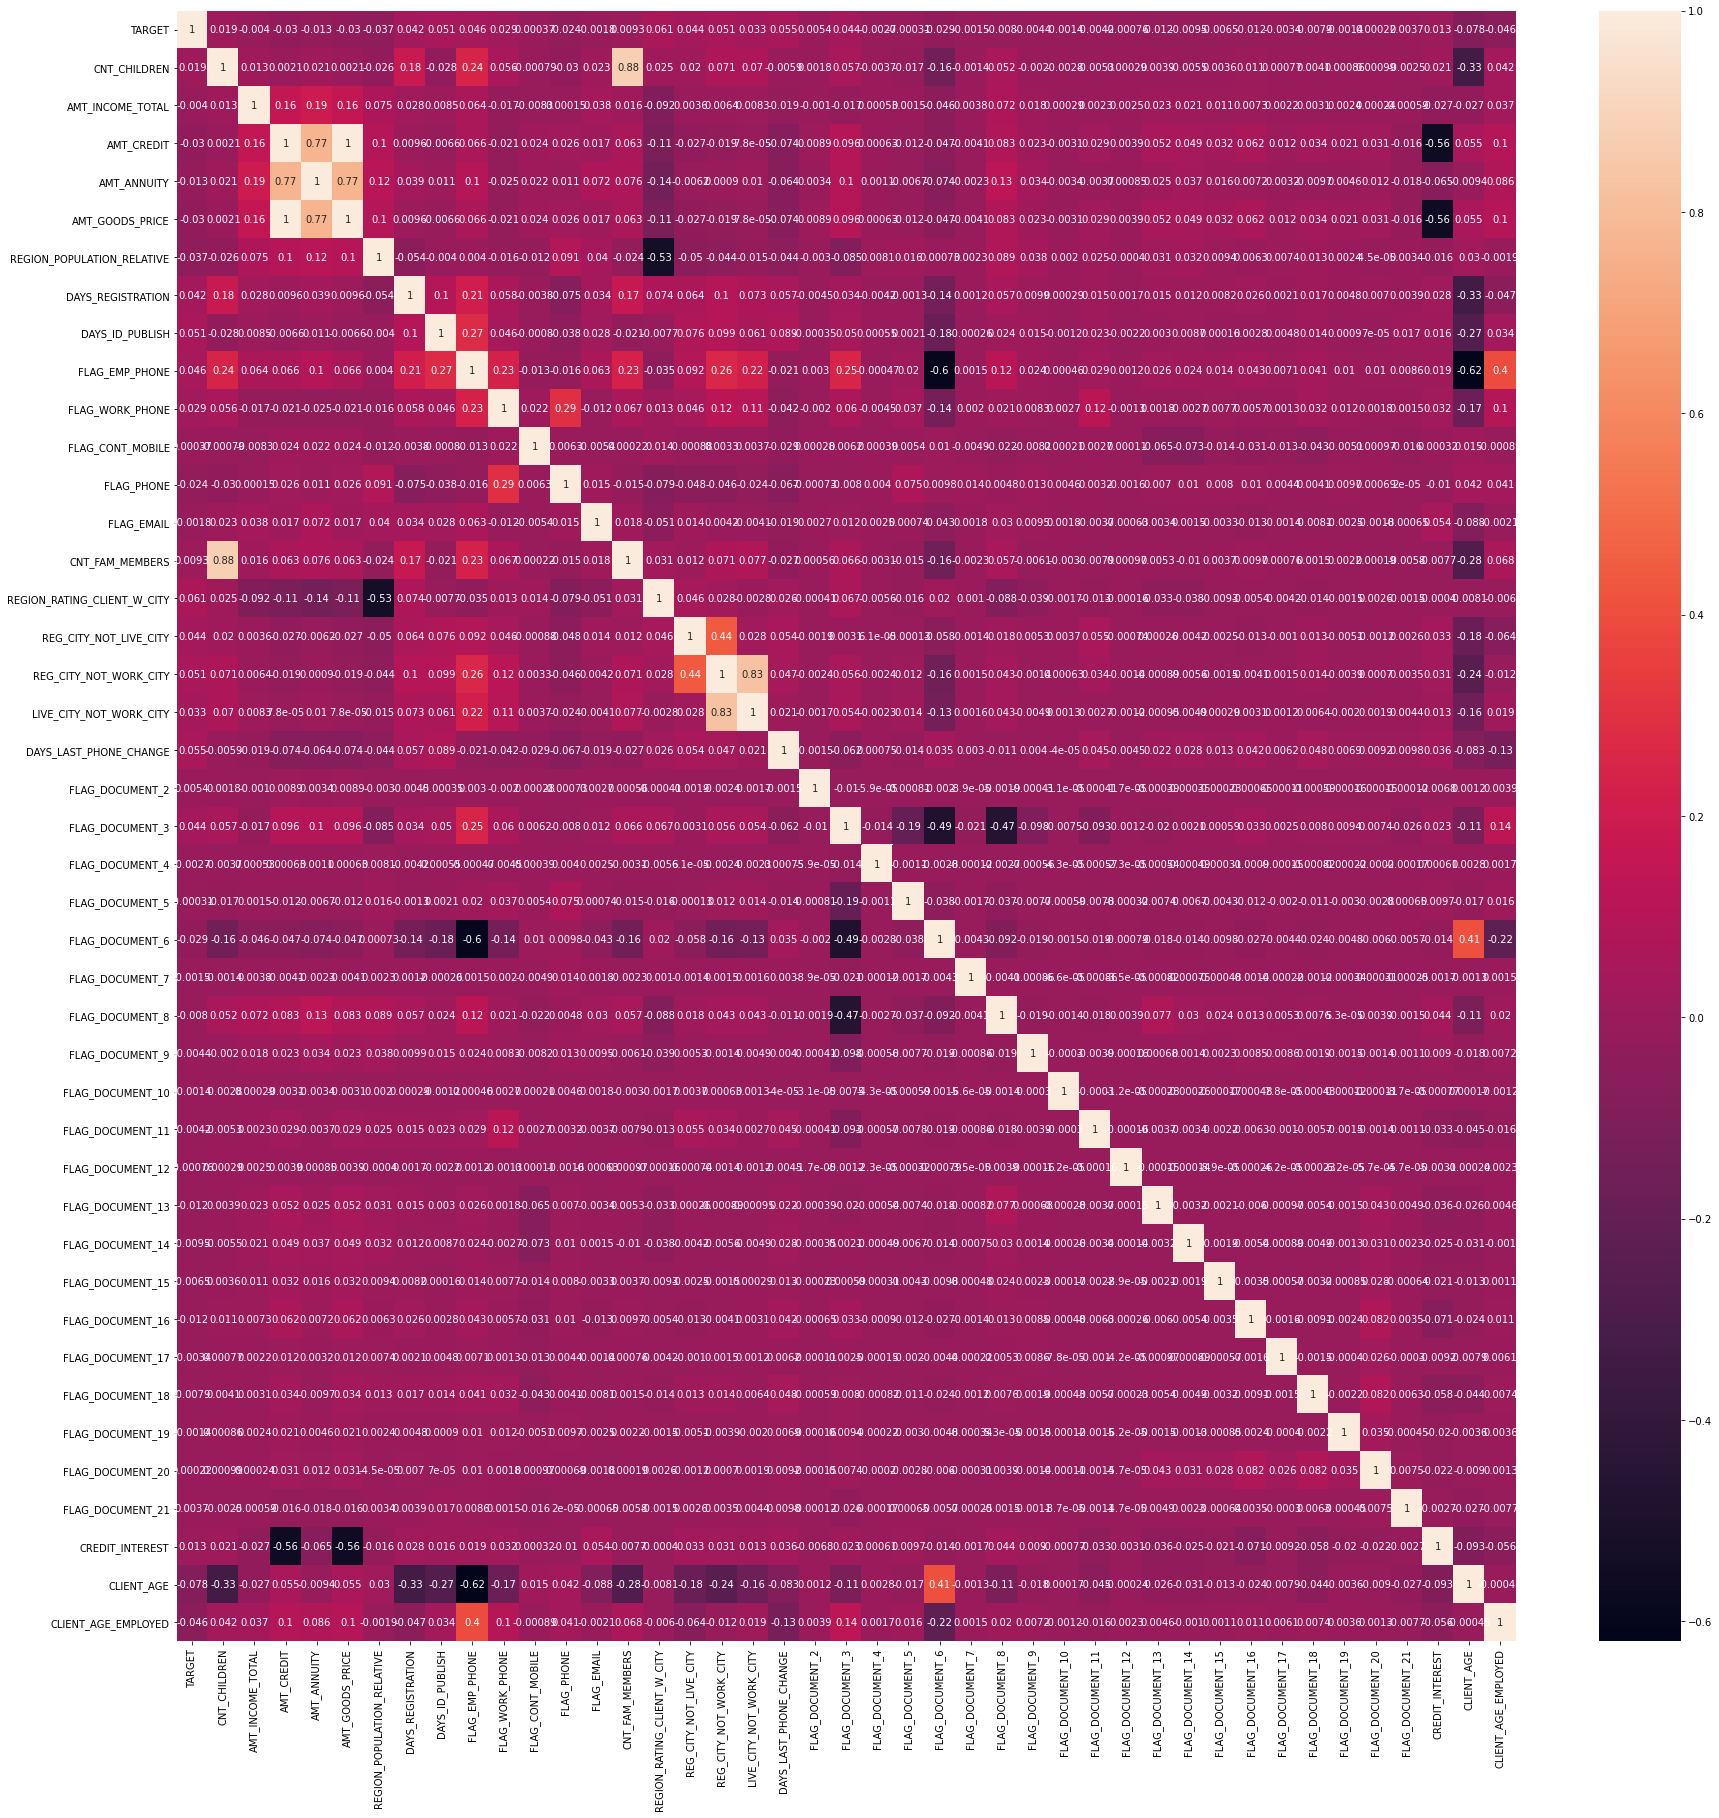

In [ ]:
# Correlation Pearson
plt.figure(figsize = (30,30))
sns.heatmap(app.corr(), annot =True)
plt.show()

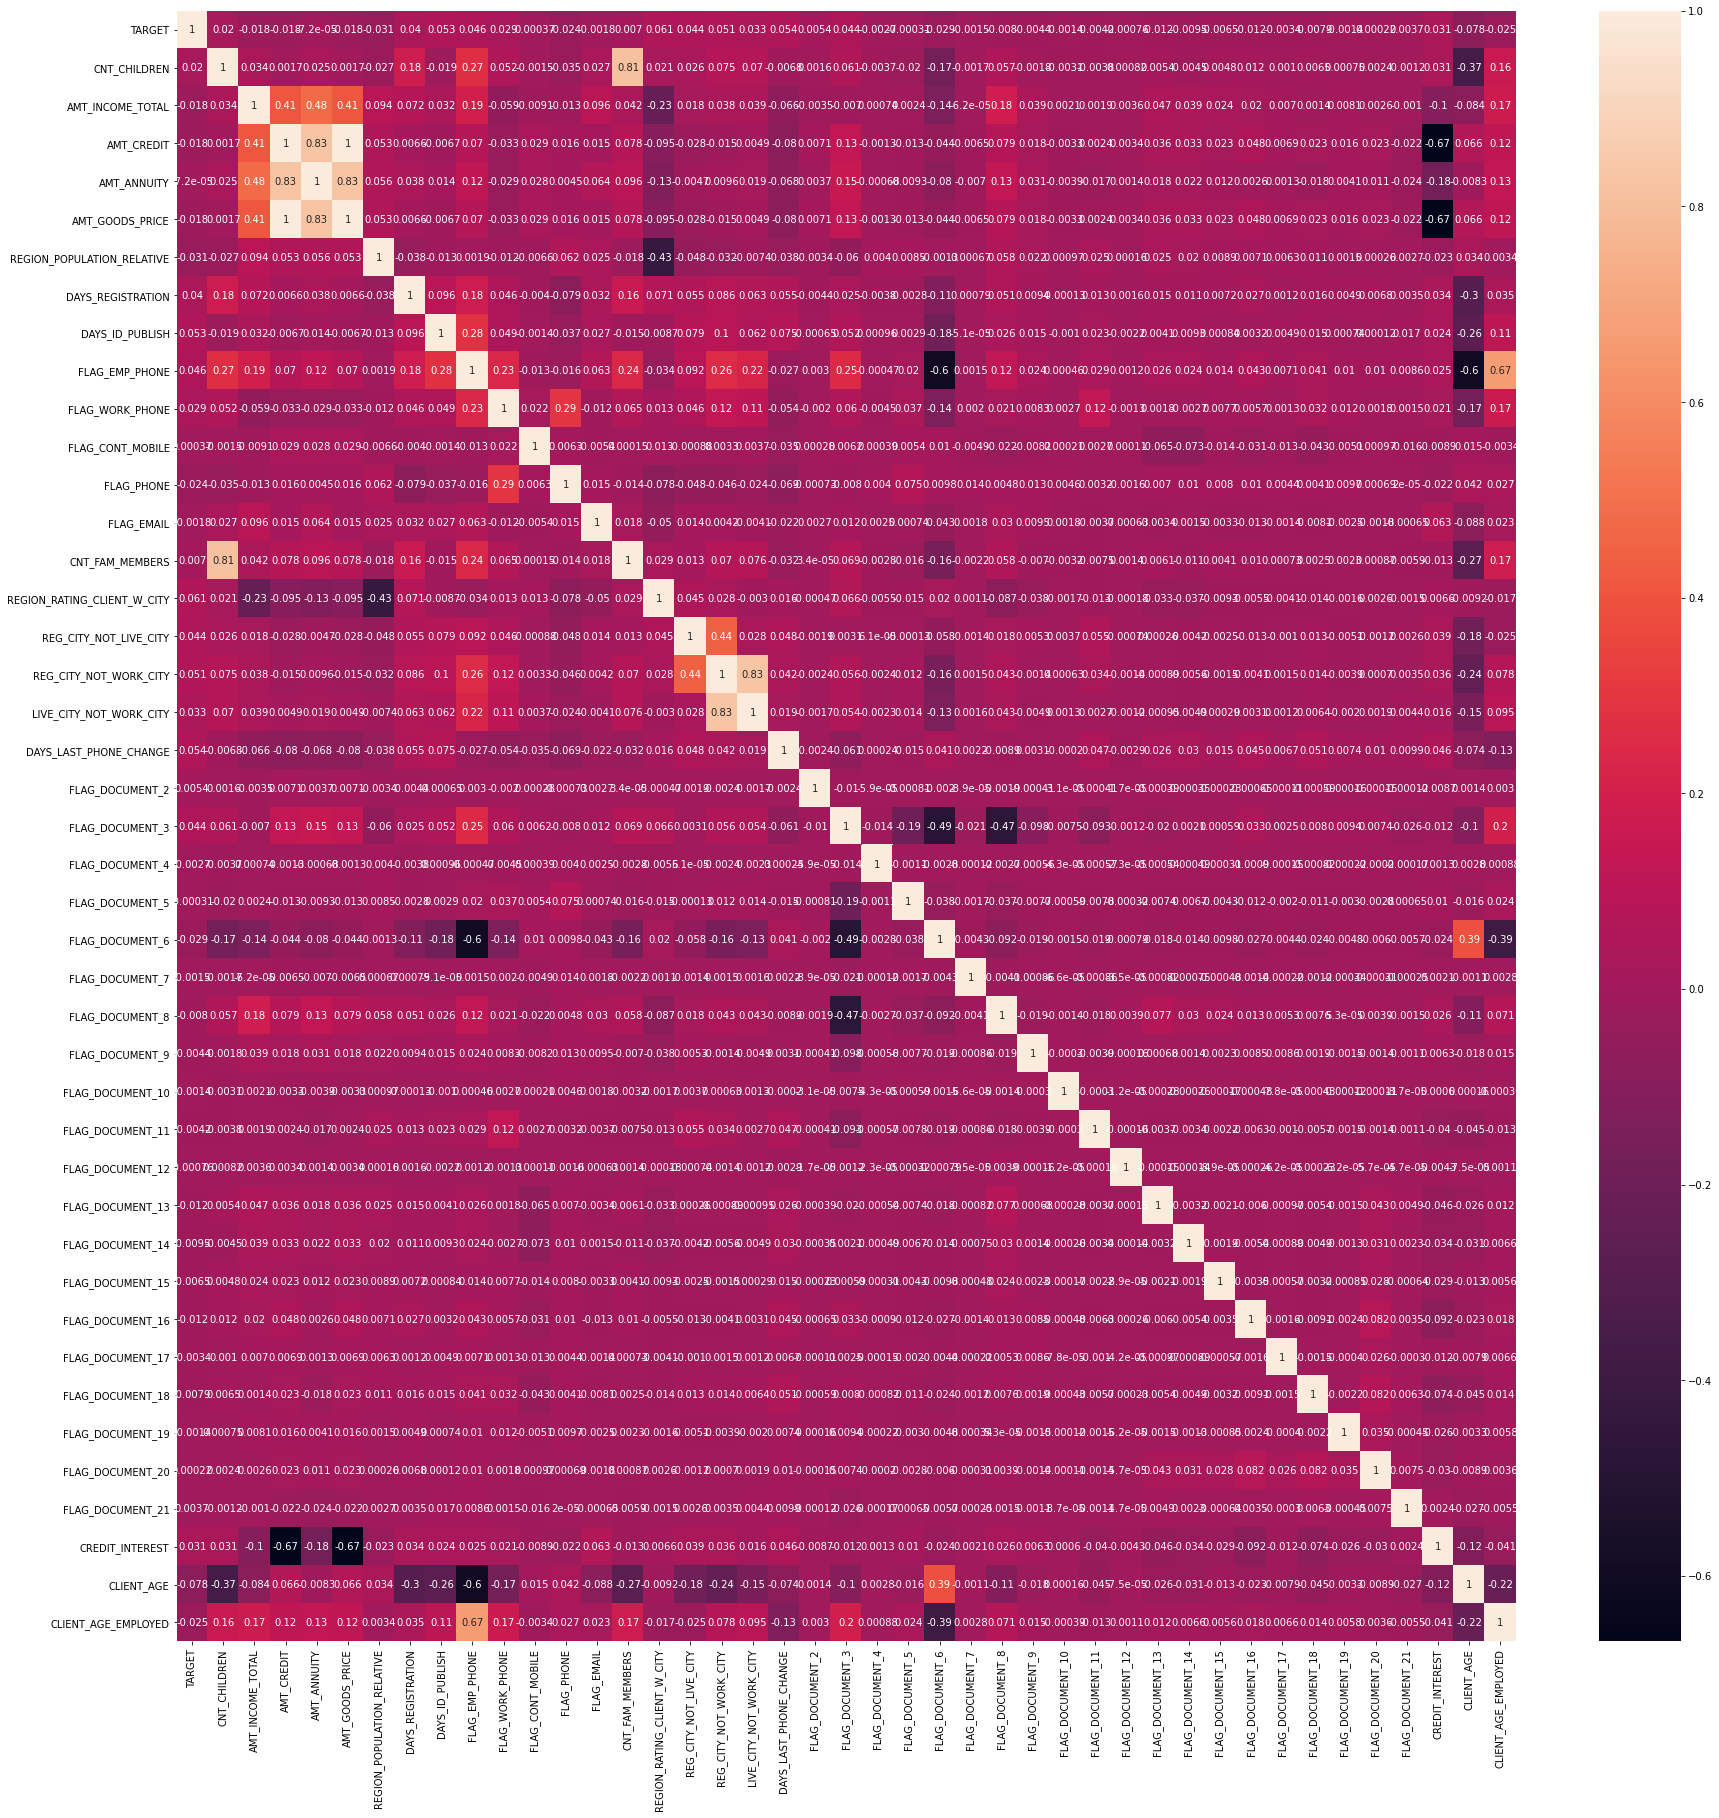

In [ ]:
plt.figure(figsize = (30,30))
sns.heatmap(app.corr('spearman'), annot =True)
plt.show()

## Hypothesis testing

TARGET
Correlation Ratio: 1.0
Not-Normal Distribution
Skewness: 3.0781241726779514, Kurtosis 7.474848422424319


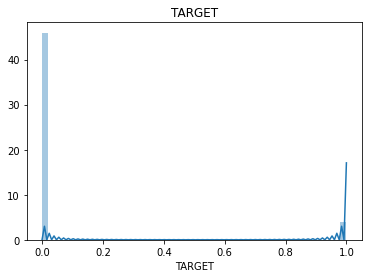



CNT_CHILDREN
Correlation Ratio: 0.019185503332836158
Not-Normal Distribution
Skewness: 1.9745798204049068, Kurtosis 7.903877330419384


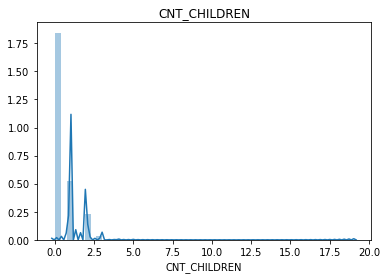



AMT_INCOME_TOTAL
Correlation Ratio: 0.0039807708877381285
Not-Normal Distribution
Skewness: 391.55862681132743, Kurtosis 191783.3908507815


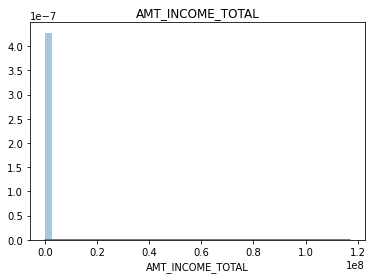



AMT_CREDIT
Correlation Ratio: 0.030369951430636227
Not-Normal Distribution
Skewness: 1.2347658439489426, Kurtosis 1.9339521025326745


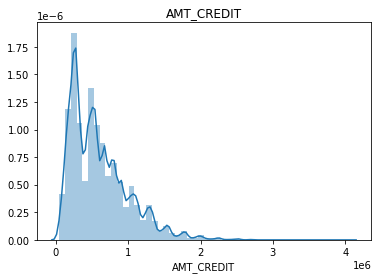



AMT_ANNUITY
Correlation Ratio: 0.012816626505165485
Not-Normal Distribution
Skewness: 1.5797609548495286, Kurtosis 7.706667023920112


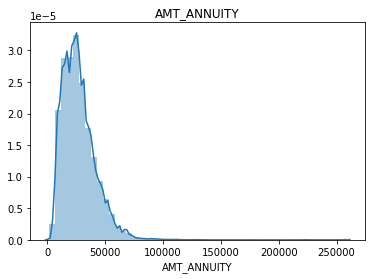



AMT_GOODS_PRICE
Correlation Ratio: 0.030369951430636227
Not-Normal Distribution
Skewness: 1.2347658439489426, Kurtosis 1.9339521025326745


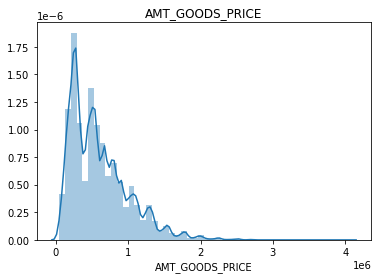



REGION_POPULATION_RELATIVE
Correlation Ratio: 0.037227619319207525
Not-Normal Distribution
Skewness: 1.4879996442539694, Kurtosis 3.259974373908542


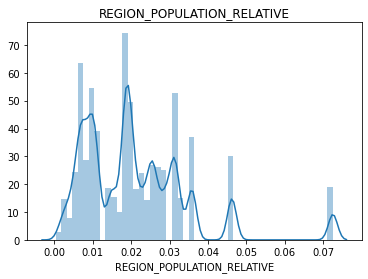



DAYS_REGISTRATION
Correlation Ratio: 0.04197641204287027
Not-Normal Distribution
Skewness: -0.5908577961067492, Kurtosis -0.32138123226164694


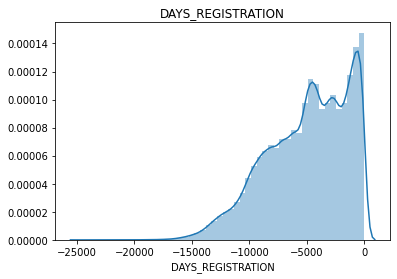



DAYS_ID_PUBLISH
Correlation Ratio: 0.05145866592795971
Not-Normal Distribution
Skewness: 0.3493357154288326, Kurtosis -1.106793586144768


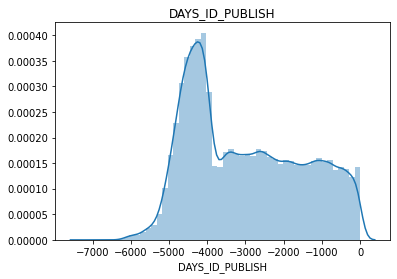



FLAG_MOBIL
Correlation Ratio: 0.0
Normal Distribution
Skewness: 0.0, Kurtosis -3.0


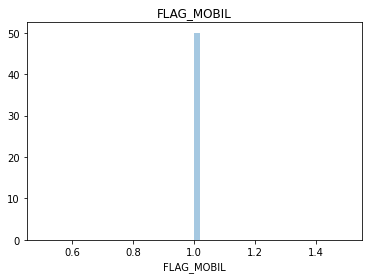



FLAG_EMP_PHONE
Correlation Ratio: 0.04598364372055978
Not-Normal Distribution
Skewness: -1.6648628583556981, Kurtosis 0.7717683371323067


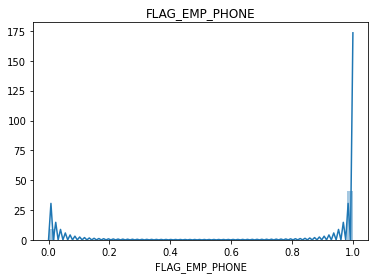



FLAG_WORK_PHONE
Correlation Ratio: 0.028525513343793052
Not-Normal Distribution
Skewness: 1.5049528001674166, Kurtosis 0.2648829307317486


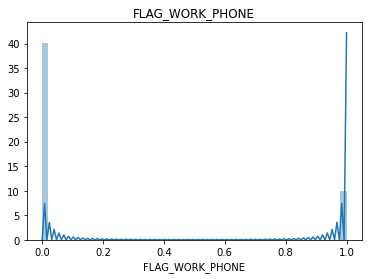



FLAG_CONT_MOBILE
Correlation Ratio: 0.00037025198696406797
Not-Normal Distribution
Skewness: -23.080946538333286, Kurtosis 530.730093105399


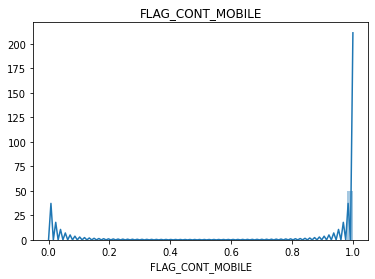



FLAG_PHONE
Correlation Ratio: 0.023806075651458092
Not-Normal Distribution
Skewness: 0.9740805843682511, Kurtosis -1.0511670151568064


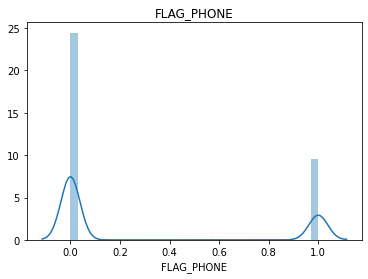



FLAG_EMAIL
Correlation Ratio: 0.0017590936331152236
Not-Normal Distribution
Skewness: 3.8328121225404734, Kurtosis 12.690448766693219


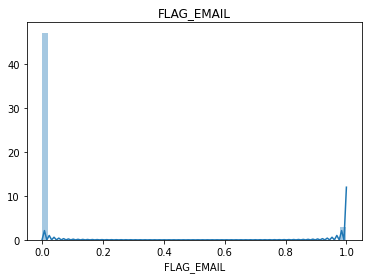



CNT_FAM_MEMBERS
Correlation Ratio: 0.009307624598818605
Not-Normal Distribution
Skewness: 0.9875349061028015, Kurtosis 2.8018919469101613


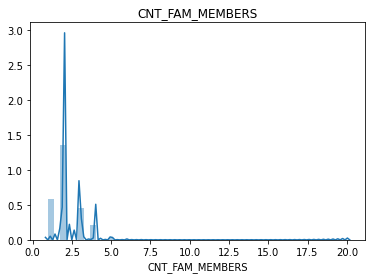



REGION_RATING_CLIENT_W_CITY
Correlation Ratio: 0.06089251355174101
Not-Normal Distribution
Skewness: 0.05972740025893826, Kurtosis 0.9335109200000589


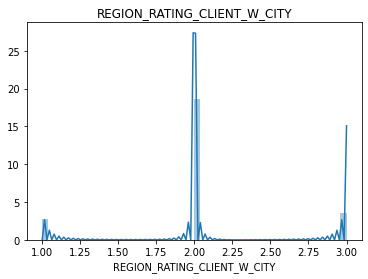



REG_CITY_NOT_LIVE_CITY
Correlation Ratio: 0.044394570287345544
Not-Normal Distribution
Skewness: 3.142745484753787, Kurtosis 7.876849181940317


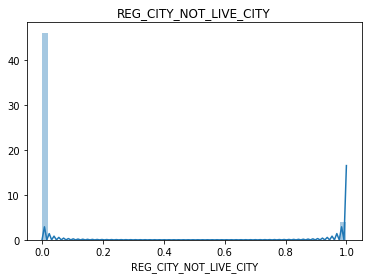



REG_CITY_NOT_WORK_CITY
Correlation Ratio: 0.05099551903866009
Not-Normal Distribution
Skewness: 1.2801379803738044, Kurtosis -0.3612467512044759


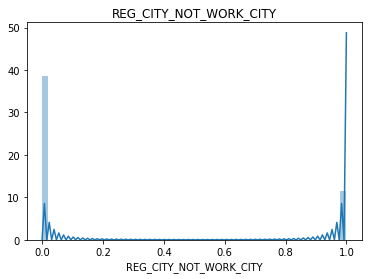



LIVE_CITY_NOT_WORK_CITY
Correlation Ratio: 0.03251977810998969
Not-Normal Distribution
Skewness: 1.6698001163266825, Kurtosis 0.7882324284846018


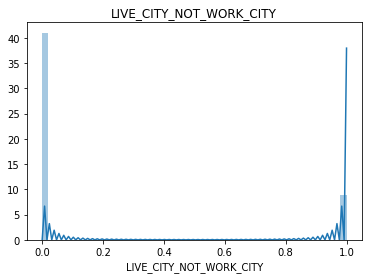



DAYS_LAST_PHONE_CHANGE
Correlation Ratio: 0.05521897403317562
Not-Normal Distribution
Skewness: -0.7135958945920254, Kurtosis -0.30861381051197156


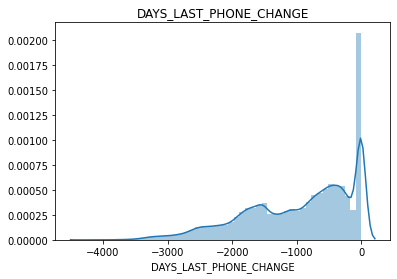



FLAG_DOCUMENT_2
Correlation Ratio: 0.005417127803440609
Not-Normal Distribution
Skewness: 153.79031692775277, Kurtosis 23649.461580738644


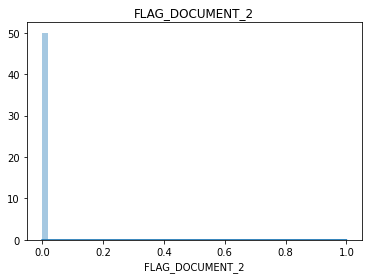



FLAG_DOCUMENT_3
Correlation Ratio: 0.044342371576729
Not-Normal Distribution
Skewness: -0.9257574550431233, Kurtosis -1.1429731344320786


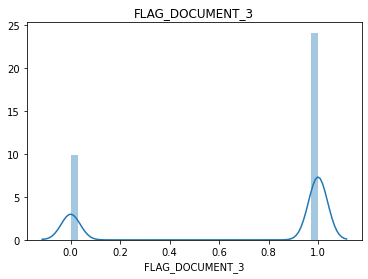



FLAG_DOCUMENT_4
Correlation Ratio: 0.0026721093842916785
Not-Normal Distribution
Skewness: 110.89328239936486, Kurtosis 12295.320081305283


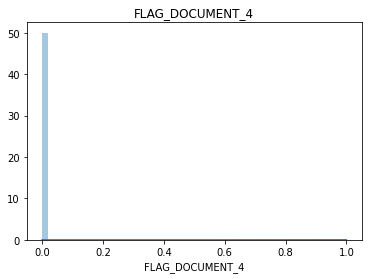



FLAG_DOCUMENT_5
Correlation Ratio: 0.0003082699522897763
Not-Normal Distribution
Skewness: 7.949137620270122, Kurtosis 61.1887889059938


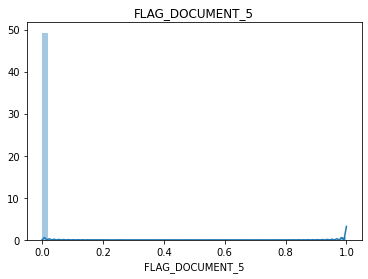



FLAG_DOCUMENT_6
Correlation Ratio: 0.028602818058968103
Not-Normal Distribution
Skewness: 2.907393459333835, Kurtosis 6.452936727377169


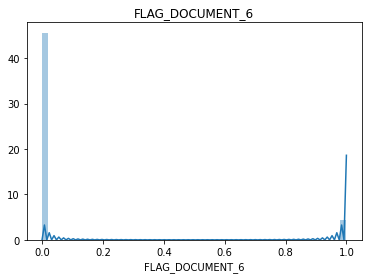



FLAG_DOCUMENT_7
Correlation Ratio: 0.0014624081072974727
Not-Normal Distribution
Skewness: 72.7932844266151, Kurtosis 5296.862257614076


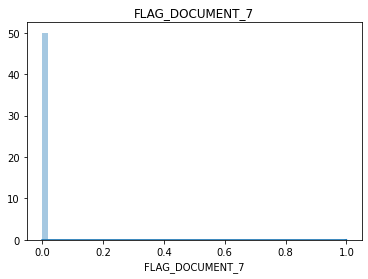



FLAG_DOCUMENT_8
Correlation Ratio: 0.008037873556523495
Not-Normal Distribution
Skewness: 3.0622860417708835, Kurtosis 7.377595801624786


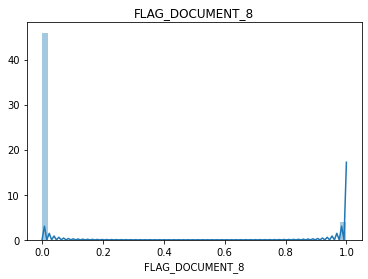



FLAG_DOCUMENT_9
Correlation Ratio: 0.004352591330310538
Not-Normal Distribution
Skewness: 15.927598224277986, Kurtosis 251.68838519402334


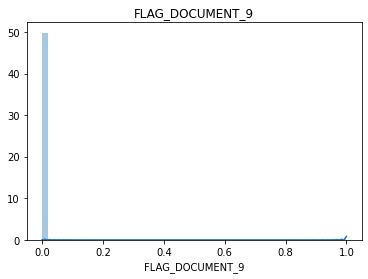



FLAG_DOCUMENT_10
Correlation Ratio: 0.0014139059970626957
Not-Normal Distribution
Skewness: 209.58700892106472, Kurtosis 43924.71430847837


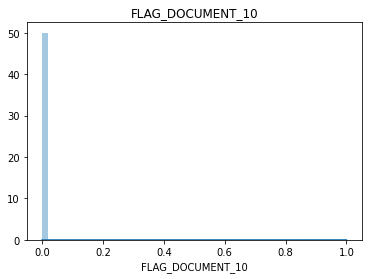



FLAG_DOCUMENT_11
Correlation Ratio: 0.004229532725289618
Not-Normal Distribution
Skewness: 15.894072796739886, Kurtosis 250.62155006806722


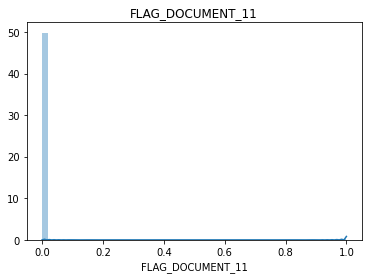



FLAG_DOCUMENT_12
Correlation Ratio: 0.000755758401112515
Not-Normal Distribution
Skewness: 392.11095369359913, Kurtosis 153749.00000650372


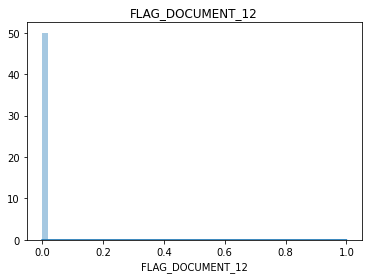



FLAG_DOCUMENT_13
Correlation Ratio: 0.011583399455770233
Not-Normal Distribution
Skewness: 16.753581837075334, Kurtosis 278.6825043715806


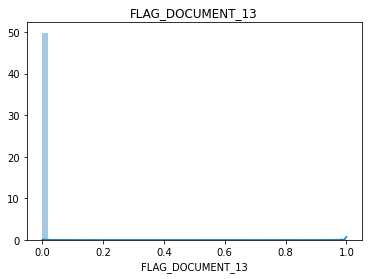



FLAG_DOCUMENT_14
Correlation Ratio: 0.009463983020756343
Not-Normal Distribution
Skewness: 18.372353305359155, Kurtosis 335.5433659769414


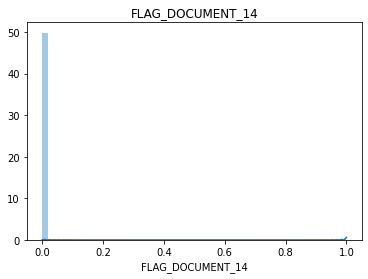



FLAG_DOCUMENT_15
Correlation Ratio: 0.006535761037106444
Not-Normal Distribution
Skewness: 28.699052593979133, Kurtosis 821.6356197919808


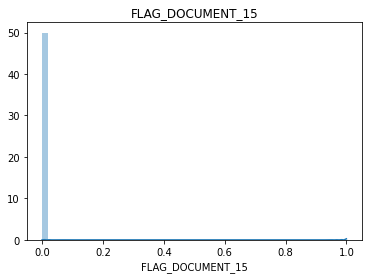



FLAG_DOCUMENT_16
Correlation Ratio: 0.011614966637576994
Not-Normal Distribution
Skewness: 9.88601288760024, Kurtosis 95.73325081379802


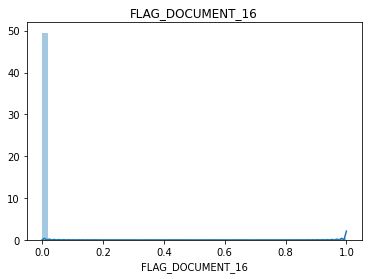



FLAG_DOCUMENT_17
Correlation Ratio: 0.003377617814967545
Not-Normal Distribution
Skewness: 61.21354284557023, Kurtosis 3745.0978277064646


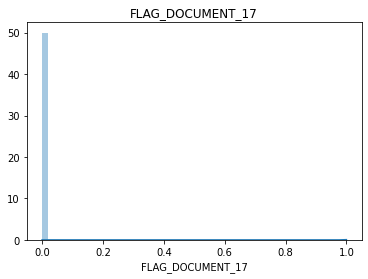



FLAG_DOCUMENT_18
Correlation Ratio: 0.007943494686656182
Not-Normal Distribution
Skewness: 10.957217446470775, Kurtosis 118.06061416924373


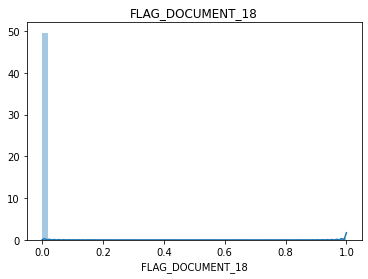



FLAG_DOCUMENT_19
Correlation Ratio: 0.0013575894573227558
Not-Normal Distribution
Skewness: 40.95573439898597, Kurtosis 1675.3721801602846


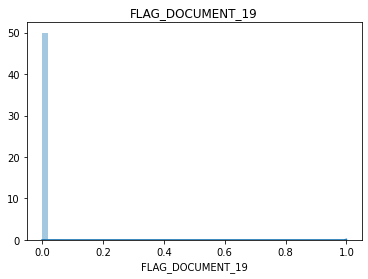



FLAG_DOCUMENT_20
Correlation Ratio: 0.00021532851799234938
Not-Normal Distribution
Skewness: 44.36446365917755, Kurtosis 1966.2056357664903


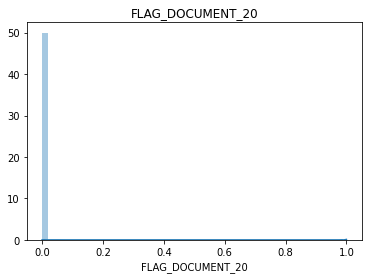



FLAG_DOCUMENT_21
Correlation Ratio: 0.0037085737041944104
Not-Normal Distribution
Skewness: 54.61240608295571, Kurtosis 2980.514898169659


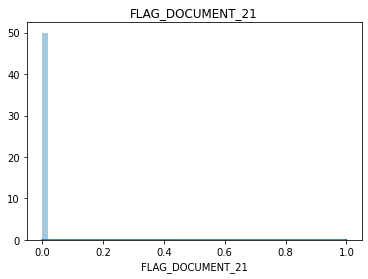



CREDIT_INTEREST
Correlation Ratio: 0.012873980174070526
Not-Normal Distribution
Skewness: 1.1119604226012383, Kurtosis 0.5211293551606406


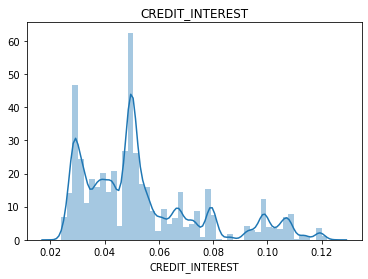



CLIENT_AGE
Correlation Ratio: 0.0782430277268756
Not-Normal Distribution
Skewness: 0.11566199354051383, Kurtosis -1.0491297740397294


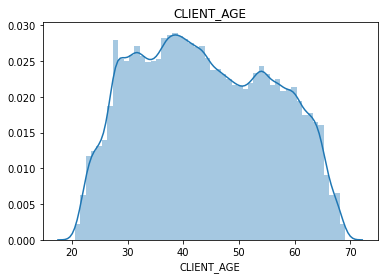



CLIENT_AGE_EMPLOYED
Correlation Ratio: 0.046054075333027286
Not-Normal Distribution
Skewness: 2.0463930429638864, Kurtosis 5.228048897179912


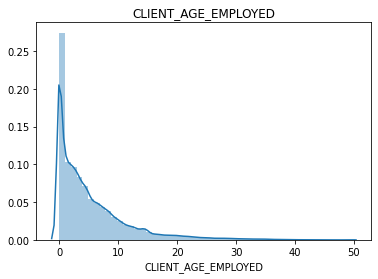

In [ ]:
from scipy.stats import shapiro, anderson, skew, kurtosis
for i in app.select_dtypes(exclude = 'object').columns:
    print(i)
    print('Correlation Ratio: {}'.format(correlation_ratio(app['TARGET'], app[i])))
    if shapiro(app[i])[1] < 0.05:
        print('Not-Normal Distribution')
    else:
        print('Normal Distribution')
        
    print('Skewness: {}, Kurtosis {}'.format(skew(app[i]), kurtosis(app[i])))
    sns.distplot(app[i])
    plt.title(i)
    plt.show()
    print('\n')
    

In [ ]:
#Cek chi2 
#H0 = Tiap category tidak memiliki hubungan

res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
res

,Column,Hypothesis
0,NAME_CONTRACT_TYPE,Reject Null Hypothesis
1,CODE_GENDER,Reject Null Hypothesis
2,FLAG_OWN_CAR,Reject Null Hypothesis
3,FLAG_OWN_REALTY,Reject Null Hypothesis
4,NAME_TYPE_SUITE,Reject Null Hypothesis
5,NAME_INCOME_TYPE,Reject Null Hypothesis
6,NAME_EDUCATION_TYPE,Reject Null Hypothesis
7,NAME_FAMILY_STATUS,Reject Null Hypothesis
8,NAME_HOUSING_TYPE,Reject Null Hypothesis
9,OCCUPATION_TYPE,Reject Null Hypothesis


In [ ]:
res = pd.DataFrame(data = [categorical_columns, cramers] 
             ).T 
res.columns = ['Column', 'Cramers_V']
res.sort_values(by = 'Cramers_V', ascending = False)

,Column,Cramers_V
9,OCCUPATION_TYPE,0.0851544
10,ORGANIZATION_TYPE,0.0710482
5,NAME_INCOME_TYPE,0.0636669
6,NAME_EDUCATION_TYPE,0.0574588
1,CODE_GENDER,0.0546636
7,NAME_FAMILY_STATUS,0.0403437
8,NAME_HOUSING_TYPE,0.0367608
0,NAME_CONTRACT_TYPE,0.0308183
2,FLAG_OWN_CAR,0.0217639
4,NAME_TYPE_SUITE,0.0111304


Data-data pada categorical value mempunyai hubungan yang tidak terlalu significant satu sama lain dengan target

In [ ]:
## Kita cek data tiap2 value yang ada dalam categorical data dengan Target dengan chi2

In [ ]:
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(app[i])
    bon_p_value = 0.05/app[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(app['TARGET'], dummies[series]))[1] < bon_p_value:
            check['{}+{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}+{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
        

In [ ]:
res_chi = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi.columns = ['Pair', 'Hypothesis']
res_chi

,Pair,Hypothesis
0,NAME_CONTRACT_TYPE+Cash loans,Reject Null Hypothesis
1,NAME_CONTRACT_TYPE+Revolving loans,Reject Null Hypothesis
2,CODE_GENDER+F,Reject Null Hypothesis
3,CODE_GENDER+M,Reject Null Hypothesis
4,CODE_GENDER+XNA,Fail to Reject Null Hypothesis
5,FLAG_OWN_CAR+N,Reject Null Hypothesis
6,FLAG_OWN_CAR+Y,Reject Null Hypothesis
7,FLAG_OWN_REALTY+N,Reject Null Hypothesis
8,FLAG_OWN_REALTY+Y,Reject Null Hypothesis
9,NAME_TYPE_SUITE+Children,Fail to Reject Null Hypothesis


In [ ]:
res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']

,Pair,Hypothesis
0,NAME_CONTRACT_TYPE+Cash loans,Reject Null Hypothesis
1,NAME_CONTRACT_TYPE+Revolving loans,Reject Null Hypothesis
2,CODE_GENDER+F,Reject Null Hypothesis
3,CODE_GENDER+M,Reject Null Hypothesis
5,FLAG_OWN_CAR+N,Reject Null Hypothesis
6,FLAG_OWN_CAR+Y,Reject Null Hypothesis
7,FLAG_OWN_REALTY+N,Reject Null Hypothesis
8,FLAG_OWN_REALTY+Y,Reject Null Hypothesis
10,NAME_TYPE_SUITE+Family,Reject Null Hypothesis
15,NAME_TYPE_SUITE+Unaccompanied,Reject Null Hypothesis


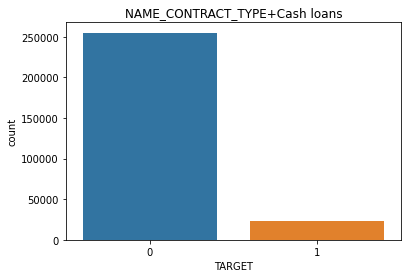

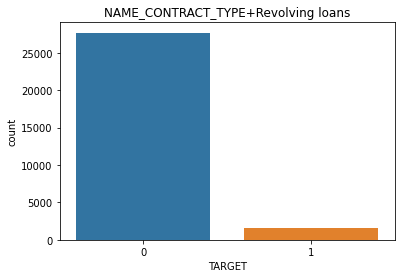

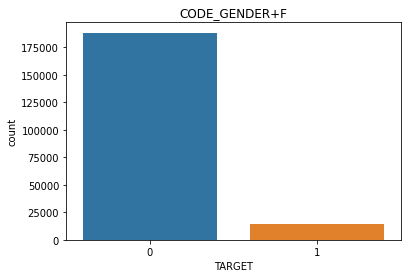

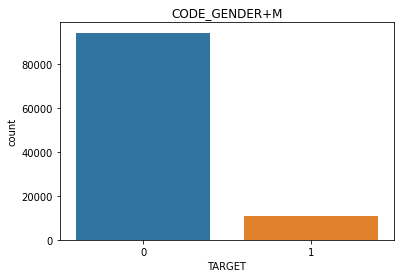

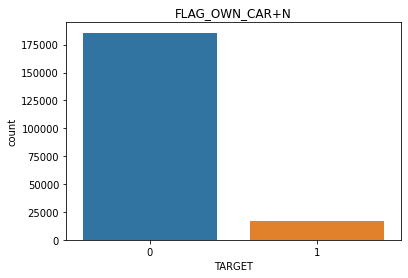

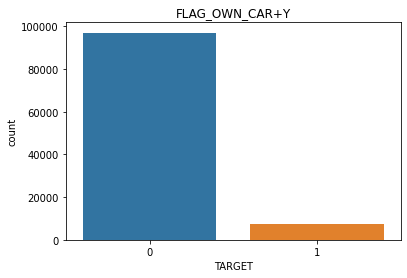

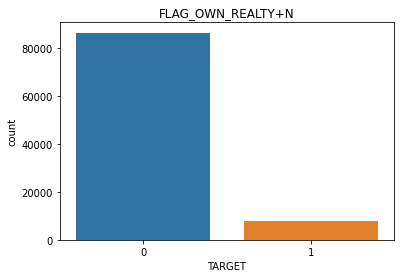

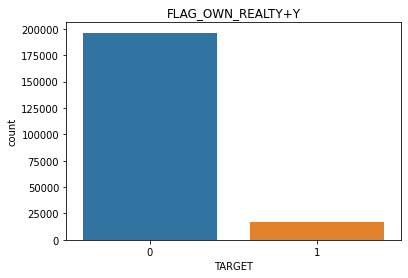

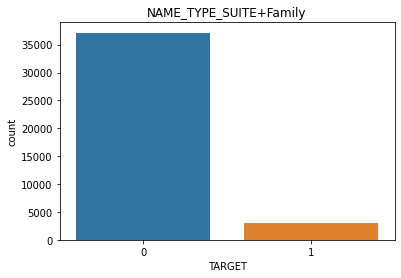

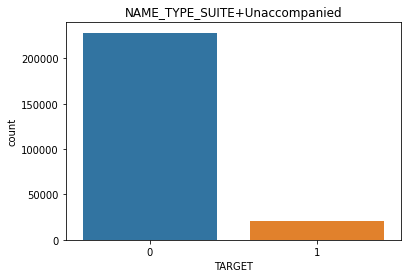

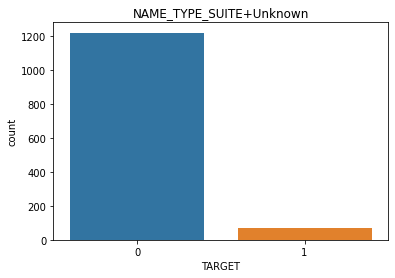

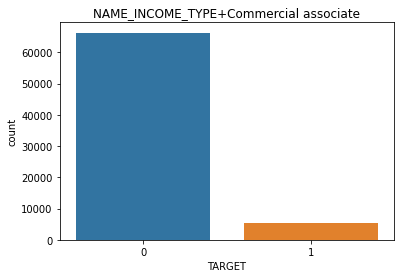

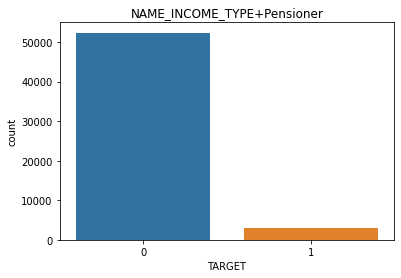

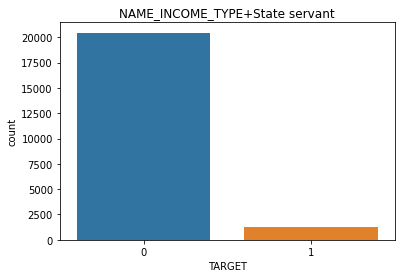

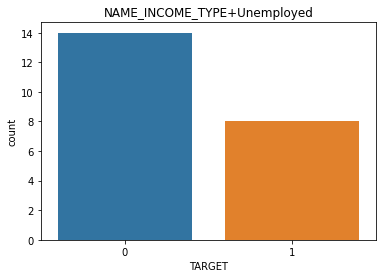

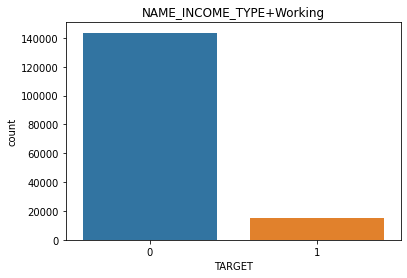

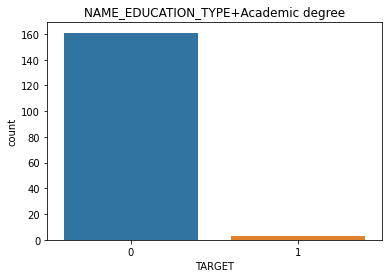

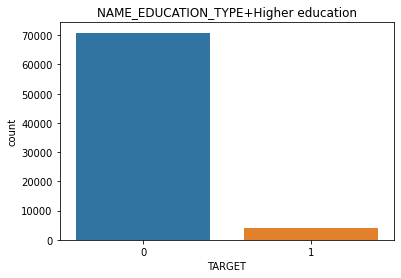

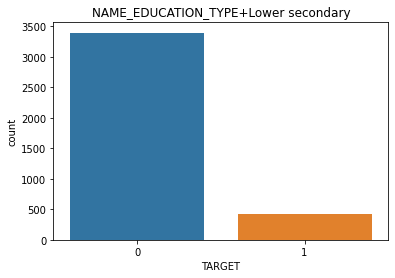

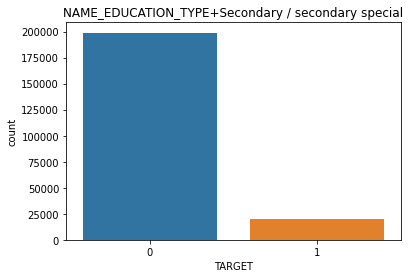

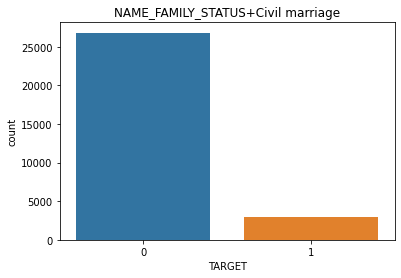

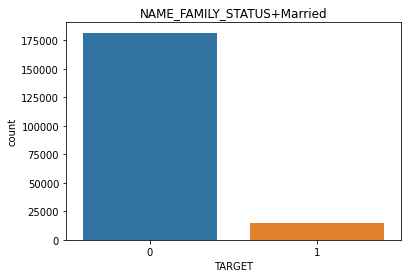

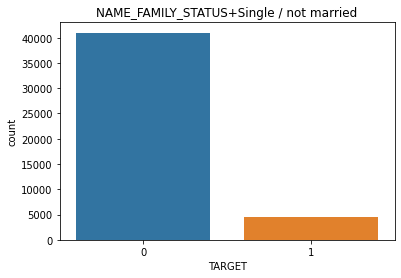

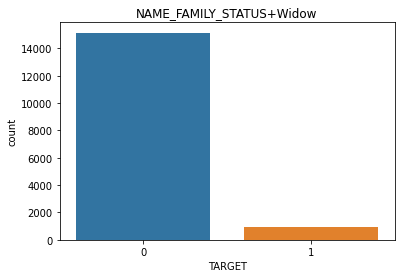

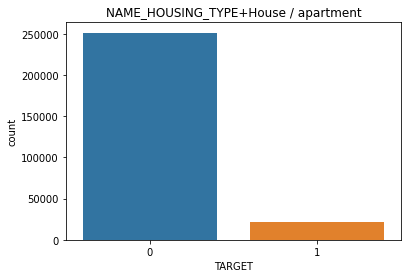

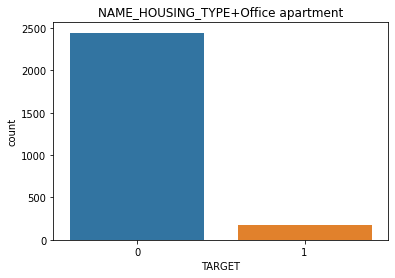

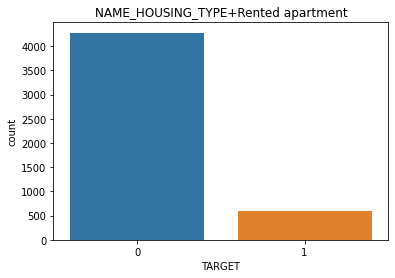

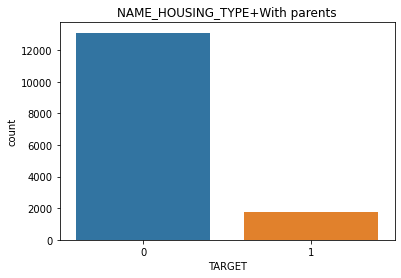

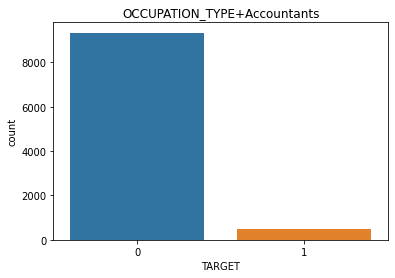

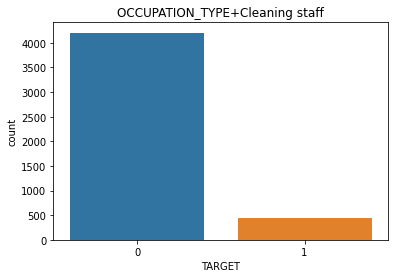

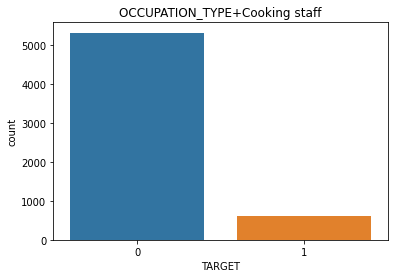

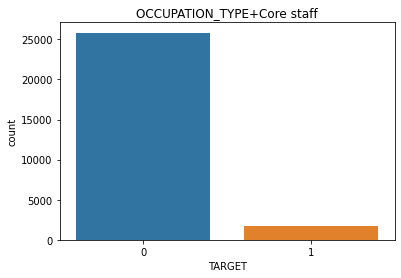

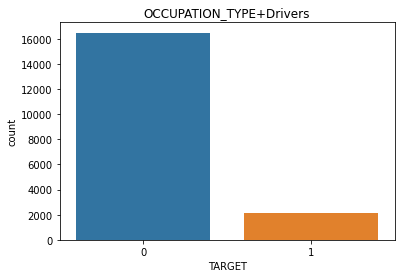

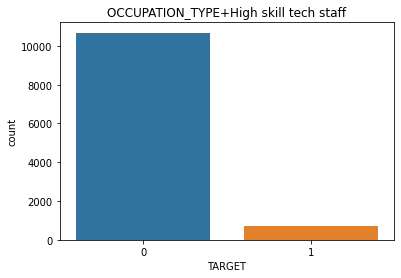

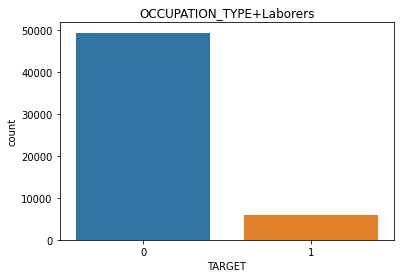

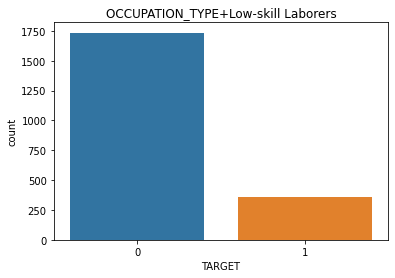

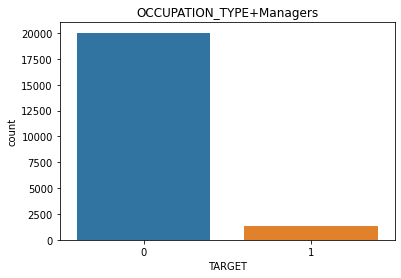

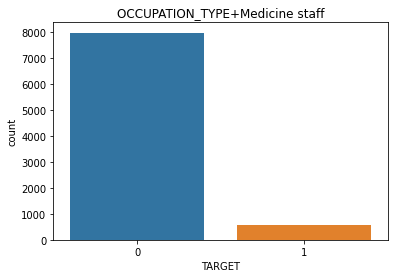

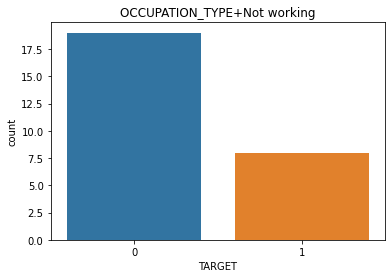

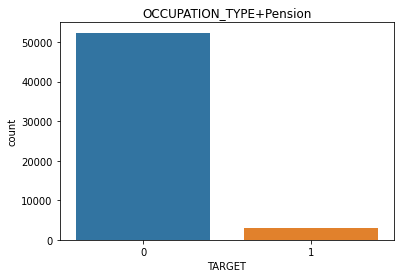

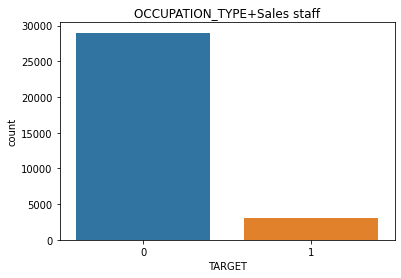

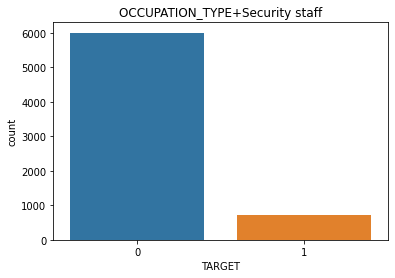

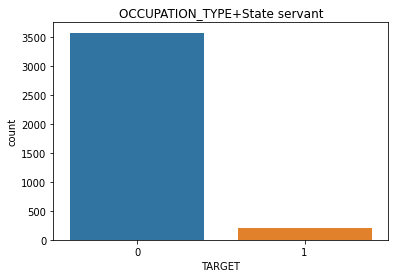

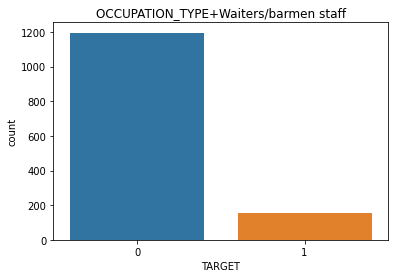

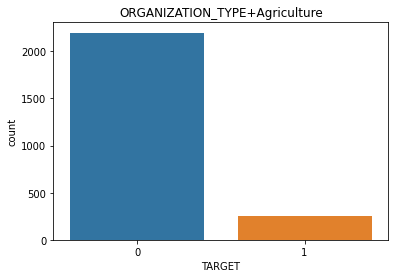

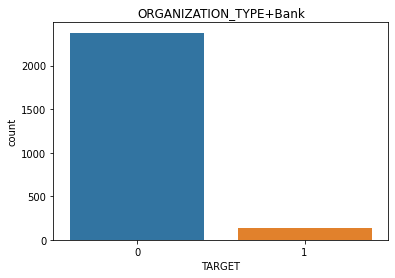

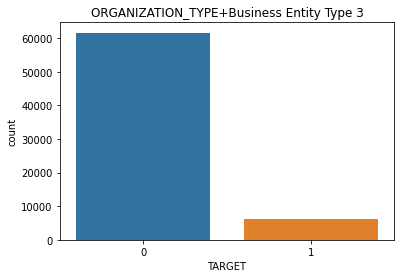

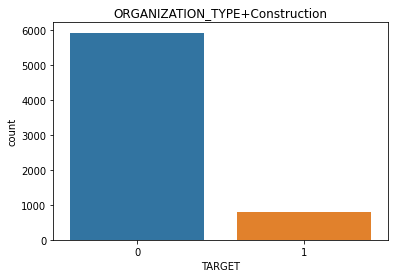

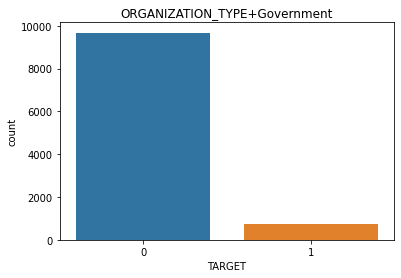

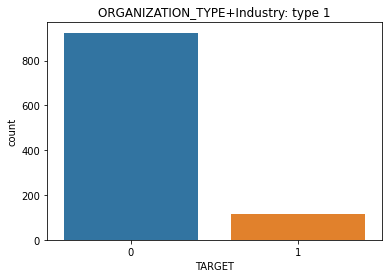

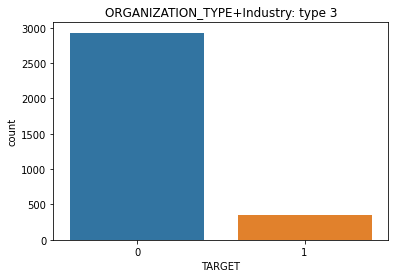

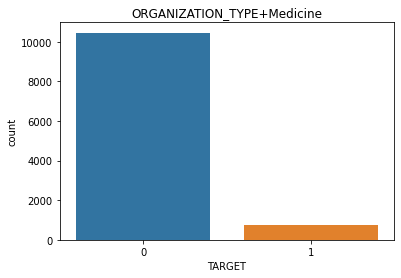

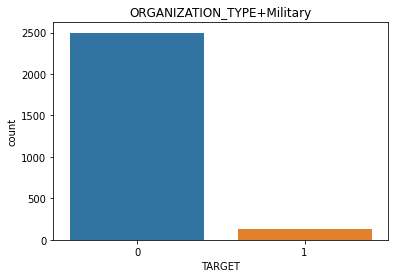

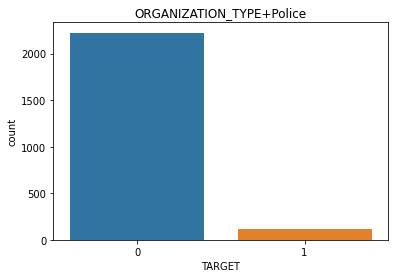

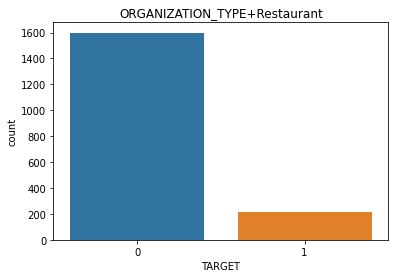

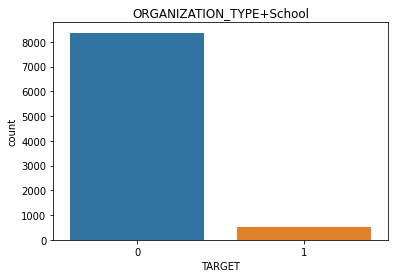

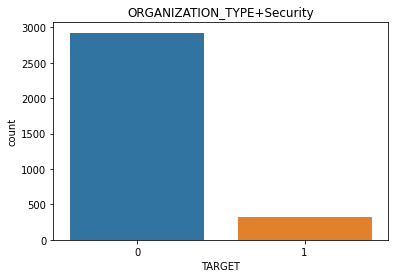

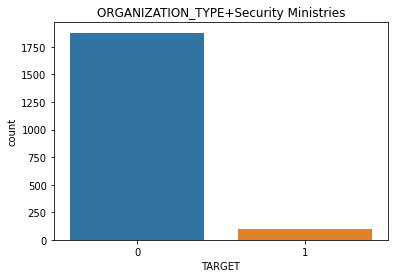

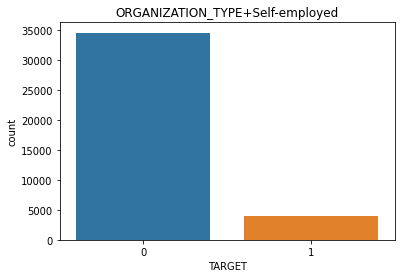

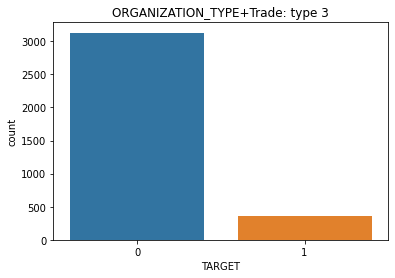

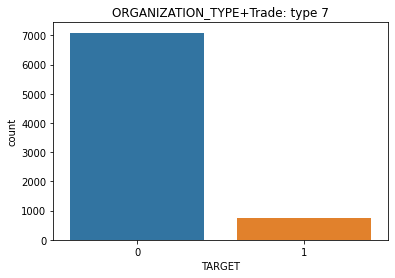

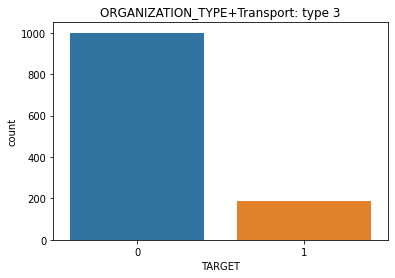

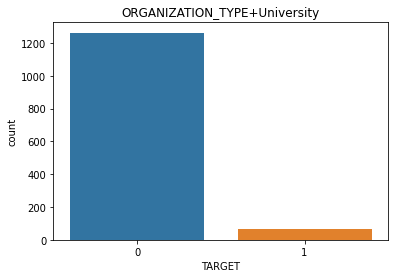

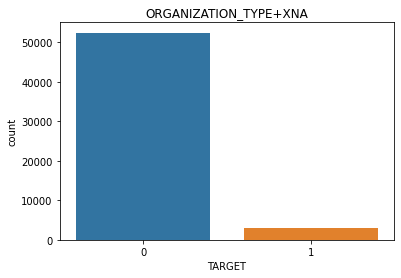

In [ ]:
for i in res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']['Pair']:
    sns.countplot(app[app[i.split('+')[0]] == (i.split('+')[1])]['TARGET'])
    plt.title(i)
    plt.show()

In [ ]:
# app_target = app['TARGET']
# app.drop(['TARGET'], axis = 1, inplace = True)

In [ ]:
# app['TARGET'] = app_target

In [ ]:
# app_binary = app[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_CITY_NOT_LIVE_CITY',
#  'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
#  'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
#  'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
#  'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']]

In [ ]:
# app.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_CITY_NOT_LIVE_CITY',
#  'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
#  'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
#  'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
#  'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis = 1, inplace = True)

In [ ]:
app.select_dtypes('number').columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'CREDIT_INTEREST', 'CLIENT_AGE',
       'CLIENT_AGE_EMPLOYED'],
      dtype='object')

In [ ]:
app.drop(['FLAG_MOBIL'], axis = 1, inplace = True)

In [ ]:
# H0 = tidak ada perbedaan signifikan terhadap 2 variable

from scipy.stats import mannwhitneyu
mann = []
for i in app.select_dtypes('number').columns:
    if mannwhitneyu(app[app['TARGET'] == 0][i], 
                    app[app['TARGET'] == 1][i])[1] < 0.05:
        mann.append('Reject Null Hypothesis')
    else:
        mann.append('Fail to Reject Null Hypothesis')

res = pd.DataFrame(data = [list(app.select_dtypes('number').columns), mann]).T
res.columns = ['Columns', 'Hypothesis']
res

,Columns,Hypothesis
0,TARGET,Reject Null Hypothesis
1,CNT_CHILDREN,Reject Null Hypothesis
2,AMT_INCOME_TOTAL,Reject Null Hypothesis
3,AMT_CREDIT,Reject Null Hypothesis
4,AMT_ANNUITY,Fail to Reject Null Hypothesis
5,AMT_GOODS_PRICE,Reject Null Hypothesis
6,REGION_POPULATION_RELATIVE,Reject Null Hypothesis
7,DAYS_REGISTRATION,Reject Null Hypothesis
8,DAYS_ID_PUBLISH,Reject Null Hypothesis
9,FLAG_EMP_PHONE,Reject Null Hypothesis


In [ ]:
corr_cat = []
for i in categorical_columns:
    temp = []
    for j in categorical_columns:
        temp.append(cramers_v(app[i], app[j]))
    corr_cat.append(temp)    

In [ ]:
corr_cat_res = pd.DataFrame(corr_cat, index = categorical_columns, columns = categorical_columns)

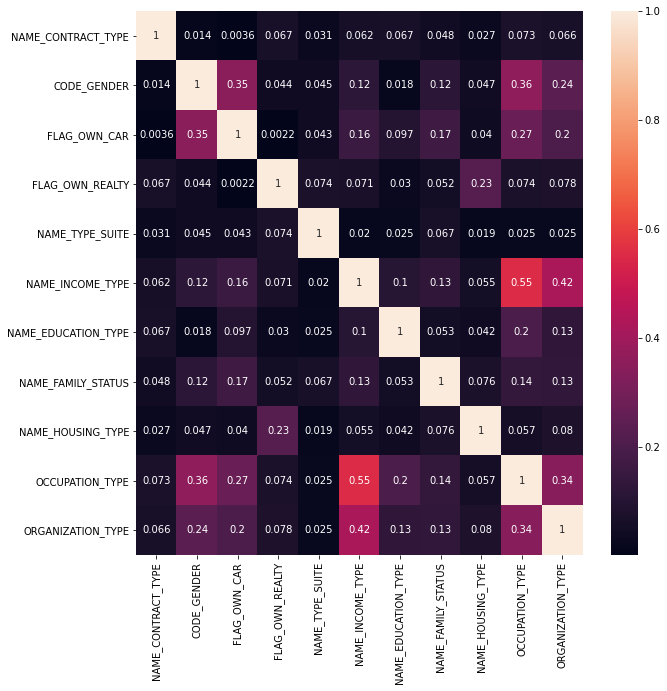

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_cat_res, annot = True)

## Machine Learning


In [ ]:
app_dummies = pd.get_dummies(data = app, columns = list(app.select_dtypes('object')), drop_first = True)

In [ ]:
app_dummies.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CREDIT_INTEREST,CLIENT_AGE,CLIENT_AGE_EMPLOYED,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_Unknown,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Not working,OCCUPATION_TYPE_Pension,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_State servant,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: t

In [ ]:
significant_chi = []
for i in res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']['Pair']:
    significant_chi.append('{}_{}'.format(i.split('+')[0],i.split('+')[1]))

In [ ]:
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Columns']:
    significant_chi.append(i)

In [ ]:
app_sig = app_dummies[significant_chi].copy()

In [ ]:
app_sig.head(10)

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_Unknown,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Not working,OCCUPATION_TYPE_Pension,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_State servant,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,CREDIT_INTEREST,CLIENT_AGE,CLIENT_AGE_EMPLOYED
0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,202500.0,406597.5,406597.5,0.018801,-3648.0,-2120,1,0,1,1.0,2,0,0,0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.061,25.920548,1.745205
1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,270000.0,1293502.5,1293502.5,0.003541,-1186.0,-291,1,0,1,2.0,1,0,0,0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.028,45.931507,3.254795
2,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67500.0,135000.0,135000.0,0.010032,-4260.0,-2531,1,1,1,1.0,2,0,0,0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.050,52.180822,0.616438
3,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135000.0,312682.5,312682.5,0.008019,-9833.0,-2437,1,0,0,2.0,2,0,0,0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.095,52.068493,8.326027
4,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121500.0,513000.0,513000.0,0.028663,-4311.0,-3458,1,0,0,1.0,2,0,1,1,-1106.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.043,54.608219,8.323288
5,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99000.0,490495.5,490495.5,0.035792,-4970.0,-477,1,1,1,2.0,2,0,0,0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.056,46.413

In [ ]:
range(app_sig.drop('TARGET', axis =1).shape[1])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(app_sig.drop('TARGET', axis = 1).values, 
                                 j) for j in range(app_sig.drop('TARGET', axis =1).shape[1])]
vif_res = pd.Series(vif, index = app_sig.drop('TARGET', axis = 1).columns, name ='VIF')
vif_res

NAME_CONTRACT_TYPE_Cash loans                                 inf
NAME_CONTRACT_TYPE_Revolving loans                            inf
CODE_GENDER_F                                        1.730143e+04
CODE_GENDER_M                                        1.730158e+04
FLAG_OWN_CAR_N                                                inf
FLAG_OWN_CAR_Y                                                inf
FLAG_OWN_REALTY_N                                             inf
FLAG_OWN_REALTY_Y                                             inf
NAME_TYPE_SUITE_Family                               2.868835e+00
NAME_TYPE_SUITE_Unaccompanied                        2.941083e+00
NAME_TYPE_SUITE_Unknown                              1.089090e+00
NAME_INCOME_TYPE_Commercial associate                1.970163e+03
NAME_INCOME_TYPE_Pensioner                           1.161122e+04
NAME_INCOME_TYPE_State servant                       7.245229e+02
NAME_INCOME_TYPE_Unemployed                          8.087751e+00
NAME_INCOM

In [ ]:
vif_drop = []
for idx, val in zip(vif_res.index, vif_res):
    if val> 10:
        vif_drop.append(idx)

In [ ]:
app_sig.drop(vif_drop, axis = 1, inplace =True)

## Coba dengan logistic regression

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(app_sig['TARGET'],sm.add_constant(app_sig.drop('TARGET', axis =1)))
result=logit_model.fit()
print(result.summary())

         Current function value: 0.267267
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               307508
Model:                          Logit   Df Residuals:                   307432
Method:                           MLE   Df Model:                           75
Date:                Mon, 06 Apr 2020   Pseudo R-squ.:                 0.04734
Time:                        14:37:46   Log-Likelihood:                -82187.
converged:                      False   LL-Null:                       -86271.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -2.5181      

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(app_sig.drop('TARGET', axis =1), app_sig['TARGET'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pd.Series(log_model.coef_.flatten(), index =app_sig.drop('TARGET', axis =1).columns)

NAME_TYPE_SUITE_Family                              -1.391987e-04
NAME_TYPE_SUITE_Unaccompanied                       -5.239169e-04
NAME_TYPE_SUITE_Unknown                             -1.346022e-05
NAME_INCOME_TYPE_Unemployed                          1.027819e-06
NAME_EDUCATION_TYPE_Academic degree                 -1.835566e-06
NAME_EDUCATION_TYPE_Higher education                -4.874714e-04
NAME_EDUCATION_TYPE_Lower secondary                  1.165082e-05
NAME_EDUCATION_TYPE_Secondary / secondary special   -2.216353e-04
NAME_FAMILY_STATUS_Single / not married             -4.025183e-05
NAME_FAMILY_STATUS_Widow                            -5.661155e-05
NAME_HOUSING_TYPE_House / apartment                 -7.432638e-04
NAME_HOUSING_TYPE_Office apartment                  -1.459872e-05
NAME_HOUSING_TYPE_Rented apartment                   6.228108e-06
NAME_HOUSING_TYPE_With parents                      -4.328484e-06
OCCUPATION_TYPE_Accountants                         -7.867310e-05
OCCUPATION

## Logistic Regression
## K FOLD

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, f1_score, log_loss, matthews_corrcoef

In [ ]:
data = app_sig.drop('TARGET', axis =1)
target = app_sig['TARGET']

In [ ]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average ='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:, 1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average ='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
from sklearn.model_selection import KFold
K = 5
kf =KFold(n_splits = K, shuffle = True, random_state = 42)

In [ ]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    #split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    logmodel = LogisticRegression()
    
    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [ ]:
for i, tr_err, val_err in zip(range(1,6,1), train_errors, validation_errors):
    print('ROC AUC Train ke {} : {}'.format(i, tr_err['roc']))
    print('ROC AUC Validation ke {} : {}'.format(i, val_err['roc']))

ROC AUC Train ke 1 : 0.6103367058475332
ROC AUC Validation ke 1 : 0.6033754917593649
ROC AUC Train ke 2 : 0.6094554703638004
ROC AUC Validation ke 2 : 0.6069939939420415
ROC AUC Train ke 3 : 0.6100725050197796
ROC AUC Validation ke 3 : 0.6042809167737275
ROC AUC Train ke 4 : 0.6135924233133181
ROC AUC Validation ke 4 : 0.6242943672802744
ROC AUC Train ke 5 : 0.615124011981076
ROC AUC Validation ke 5 : 0.6200980743943589


In [ ]:
for i, tr_err, val_err in zip(range(1,6,1), train_errors, validation_errors):
    print('Accuracy Train ke {} : {}'.format(i, tr_err['accuracy']))
    print('Accuracy Validation ke {} : {}'.format(i, val_err['accuracy']))

Accuracy Train ke 1 : 0.9190670146256595
Accuracy Validation ke 1 : 0.9200838997105785
Accuracy Train ke 2 : 0.9190141703860881
Accuracy Validation ke 2 : 0.9202952749504081
Accuracy Train ke 3 : 0.9192946513499671
Accuracy Validation ke 3 : 0.919173360215928
Accuracy Train ke 4 : 0.919380342835773
Accuracy Validation ke 4 : 0.9188305881205183
Accuracy Train ke 5 : 0.9195957838598089
Accuracy Validation ke 5 : 0.9179688135152274


In [ ]:
for i, tr_err, val_err in zip(range(1,6,1), train_errors, validation_errors):
    print(f'Report Train ke {i} :')
    print(tr_err['report'])
    print(f'Report Validation ke {i} :')
    print(val_err['report'])

Report Train ke 1 :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226096
           1       0.00      0.00      0.00     19910

    accuracy                           0.92    246006
   macro avg       0.46      0.50      0.48    246006
weighted avg       0.84      0.92      0.88    246006

Report Validation ke 1 :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56587
           1       0.00      0.00      0.00      4915

    accuracy                           0.92     61502
   macro avg       0.46      0.50      0.48     61502
weighted avg       0.85      0.92      0.88     61502

Report Train ke 2 :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226083
           1       0.00      0.00      0.00     19923

    accuracy                           0.92    246006
   macro avg       0.46      0.50      0.48    246006
weighted 

In [ ]:
matrix = []
for i, j in zip(train_errors, validation_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'],
                   j['roc'], i['f1'], j['f1'], i['matthew'], j['matthew'], i['logloss'], j['logloss']])
calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy', 
                                              'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score', 
                                'Test F1 Score', 'Train Matthews Corr Coef',
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())
    
average_mat = pd.DataFrame(average).T
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score', 
                                'Test F1 Score', 'Train Matthews Corr Coef',
                       'Test Matthews Corr Coef' , 'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')    
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation 

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.919067,0.920084,0.610337,0.603375,0.478913,0.479189,0.0,0.0,0.277039,0.276411
2 Iteration,0.919014,0.920295,0.609455,0.606994,0.478899,0.479247,0.0,0.0,0.277639,0.275033
3 Iteration,0.919295,0.919173,0.610073,0.604281,0.478975,0.478942,0.0,0.0,0.276934,0.277872
4 Iteration,0.919380,0.918831,0.613592,0.624294,0.478999,0.478849,0.0,0.0,0.276447,0.275715
5 Iteration,0.919596,0.917969,0.615124,0.620098,0.479057,0.478615,0.0,0.0,0.275683,0.278497
Average,0.919270,0.919270,0.611716,0.611809,0.478969,0.478969,0.0,0.0,0.276748,0.276706


Saya mencoba menggunakan model yang lain selain model boosting pada notebook sebelumnya, namun ternyata hasil masih sama seperti model boosting. Perlu pendalaman pada feature engineering agar model dapat membedakan antara pendaftar gagal bayar maupun tidak